<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

**Carga y caracterización del dataset**

In [2]:
# Carga de los datos a un dataframe y comprobar dimensionalidad
df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data.csv",delimiter=";")
df.shape

(141, 104)

In [3]:
df.describe()

,ID,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,...,EE2,EE3,EE4,EE5,EE6,CSSC1,CSSC2,TLKS1,TLKS2,TLKS3
count,141.000000,130.000000,130.000000,130.000000,125.000000,125.000000,125.000000,125.000000,125.00000,124.000000,...,115.000000,109.000000,112.000000,112.000000,112.000000,124.000000,124.000000,124.000000,124.000000,123.000000
mean,71.000000,4.376923,4.284615,3.684615,4.592000,4.240000,4.400000,4.128000,4.44000,4.637097,...,3.860870,3.899083,3.312500,3.830357,3.821429,4.895161,4.459677,4.258065,3.298387,3.845528
std,40.847277,1.252999,1.101335,1.276105,1.198763,1.346441,1.257237,1.224587,1.37019,0.931252,...,1.336971,1.325986,1.445909,1.419862,1.363714,1.088137,1.143374,1.125253,1.331176,1.509709
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,36.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000
50%,71.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.00000,5.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,4.000000
75%,106.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,6.000000,5.000000,5.000000,4.000000,5.000000
max,141.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [4]:
df.head(10)

,ID,IDIOMA,AREA,EQUIPO,VD1,VD7,V1,V2,V3,SA1,...,EE3,EE4,EE5,EE6,CSSC1,CSSC2,TLKS1,TLKS2,TLKS3,Obs1
0,9,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,4.0,4.0,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,4.0,4.0,NaN
1,12,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,4.0,5.0,3.0,5.0,...,3.0,3.0,3.0,3.0,6.0,4.0,3.0,2.0,5.0,NaN
2,17,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Femenino,5.0,4.0,5.0,4.0,...,5.0,1.0,5.0,6.0,6.0,6.0,5.0,3.0,2.0,NaN
3,30,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,5.0,5.0,5.0,...,4.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,4.0,NaN
4,32,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,6.0,6.0,2.0,1.0,1.0,NaN
5,34,CASTELLANO,Tecnología,Astillero,Más de 20 años,Femenino,5.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,4.0,4.0,3.0,3.0,4.0,NaN
6,45,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,5.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,6.0,6.0,4.0,2.0,4.0,LKS TENDRIA QUE TENER UNA VISION MAS INTERNACI...
7,47,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,2.0,1.0,NaN
8,56,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,4.0,5.0,3.0,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,5.0,5.0,LKS deberí­a utilizar la oficina de Astillero ...
9,60,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,6.0,5.0,4.0,5.0,...,4.0,4.0,4.0,4.0,6.0,5.0,5.0,4.0,5.0,"Evolucionar los equipos, áreas y departamentos..."


**Histograma de valores nulos por atributo en el dataframe original**

In [5]:
missing_values = df.isnull().sum()


In [6]:
missing_percentage = (missing_values / len(df)) * 100

threshold = 1
attributes_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()


len(attributes_with_missing)

102

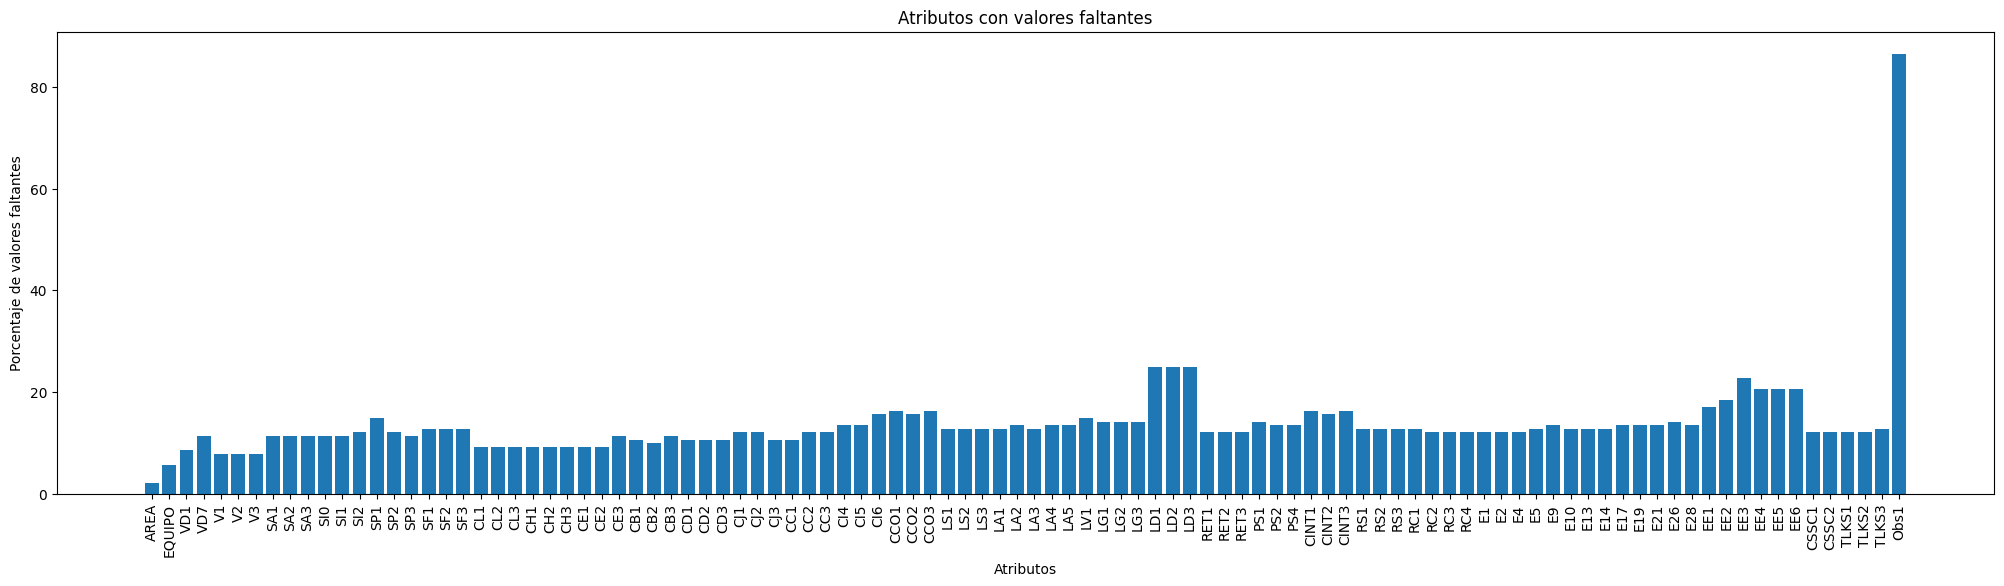

In [7]:
plt.figure(figsize=(25, 6))
plt.bar(attributes_with_missing, missing_percentage[attributes_with_missing])
plt.xlabel('Atributos')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Atributos con valores faltantes')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad

plt.show()

**Eliminación de filas con todos los valores nulos**

In [8]:
# Elimina los registros con todos los valores nulos, excepto las columnas de dimensiones
#df_sin_nulos = df.dropna(subset=df.columns.difference(dimensiones), how='all',inplace=False)
df_sin_nulos = df[df.columns[6:]].dropna(how='all',inplace=False)


In [9]:
df_sin_nulos.describe()

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,EE2,EE3,EE4,EE5,EE6,CSSC1,CSSC2,TLKS1,TLKS2,TLKS3
count,130.000000,130.000000,130.000000,125.000000,125.000000,125.000000,125.000000,125.00000,124.000000,120.000000,...,115.000000,109.000000,112.000000,112.000000,112.000000,124.000000,124.000000,124.000000,124.000000,123.000000
mean,4.376923,4.284615,3.684615,4.592000,4.240000,4.400000,4.128000,4.44000,4.637097,2.758333,...,3.860870,3.899083,3.312500,3.830357,3.821429,4.895161,4.459677,4.258065,3.298387,3.845528
std,1.252999,1.101335,1.276105,1.198763,1.346441,1.257237,1.224587,1.37019,0.931252,1.598297,...,1.336971,1.325986,1.445909,1.419862,1.363714,1.088137,1.143374,1.125253,1.331176,1.509709
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,1.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000
50%,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.00000,5.000000,2.500000,...,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,6.000000,5.000000,5.000000,4.000000,5.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


**Histograma de valores nulos por atributo en del dataframe sin filas nulas**

In [10]:
# Se obtiene el número de valores faltantes por cada atributo
missing_values = df_sin_nulos.isnull().sum()

In [11]:
# Se seleccionan aquellos atributos que tengan más de un umbral de valores faltantes
threshold = 10

missing_percentage = (missing_values / len(df_sin_nulos)) * 100

attributes_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()

len(attributes_with_missing)

17

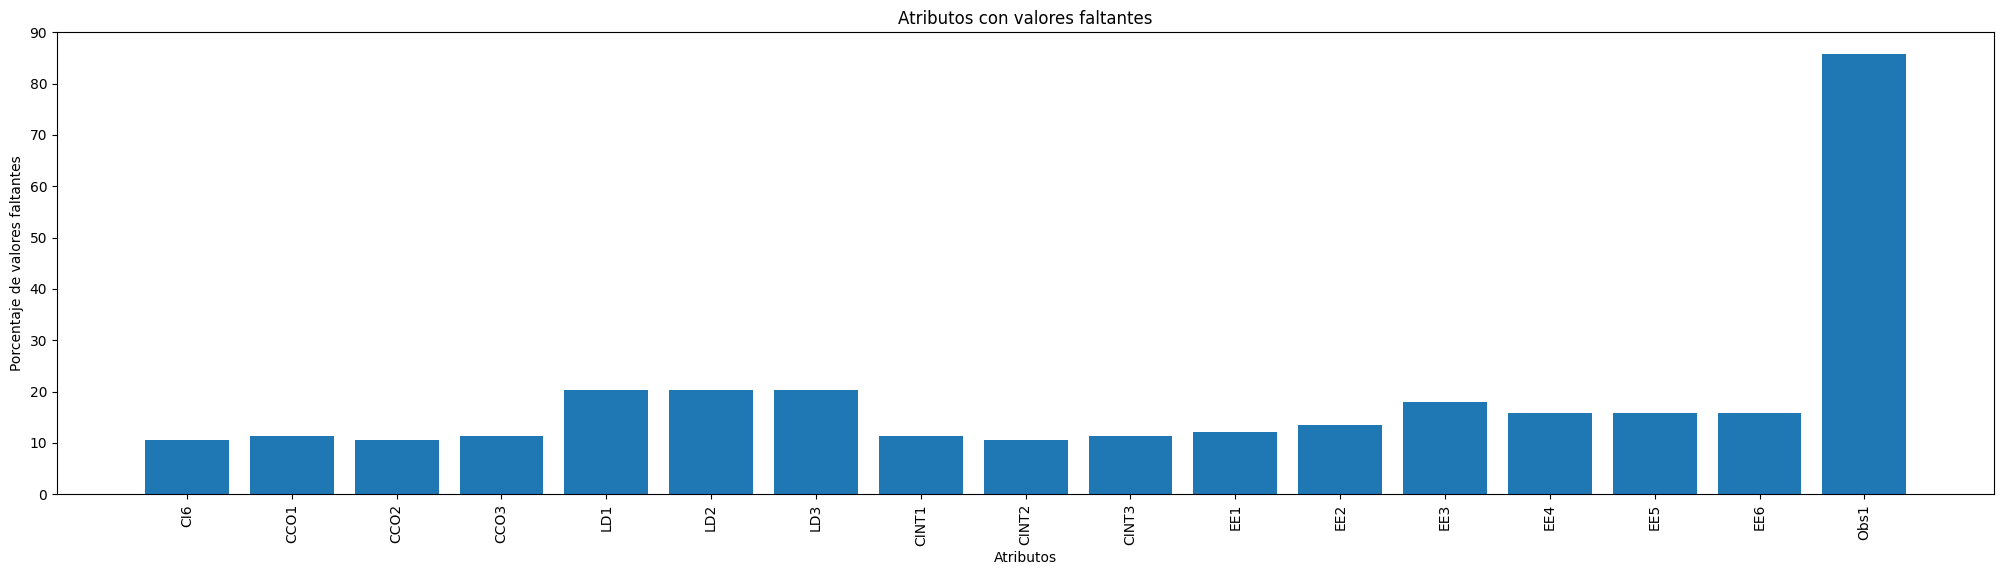

In [12]:
# Se dibujan los atributos que superan el umbral de valores faltantes
plt.figure(figsize=(25, 6))
plt.bar(attributes_with_missing, missing_percentage[attributes_with_missing])
plt.xlabel('Atributos')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Atributos con valores faltantes')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad

plt.show()



---


Diagrama de dispersión de valores vacíos por dimensiones

---





**Creación de campos con valores medios por cada tema en las preguntas**

Cada tema se caracteriza por los caracteres iniciales de los nombres de las columnas

In [13]:
# Función que realiza los siguientes pasos:
# - Ignora los campos de dimensiones (primeros 6)
# - Selecciona las columnas que pertenecen a un mismo grupo (por las iniciales)
# - Crea una nueva columna con la media por cada tema, evitando los campos con valores no númericos

def agrupar_campos_y_calcular_media(dataframe):
    columnas = dataframe.columns[6:]  # Ignorar los primeros 6 campos

    # Filtrar las columnas que siguen el patrón "letras seguidas de números"
    columnas_a_agrupar = [columna for columna in columnas if re.match(r"[a-zA-Z]+\d+", columna)]

    for columna in columnas_a_agrupar:
        # Extraer las letras de la columna
        letras = re.match(r"([a-zA-Z]+)\d+", columna).group(1)

        # Filtrar las columnas con las mismas letras
        columnas_con_letras = [c for c in columnas if c.startswith(letras)]

        # Filtrar las columnas numéricas para calcular la media
        columnas_numericas = [c for c in columnas_con_letras if pd.api.types.is_numeric_dtype(dataframe[c])]

        # Crear una nueva columna con valores NaN
        dataframe[f'{letras}_media'] = np.nan

        # Asignar los valores de la media a la nueva columna
        dataframe.loc[:, f'{letras}_media'] = dataframe[columnas_numericas].mean(axis=1)


    return dataframe

In [14]:
# Llamamos a la función para agrupar y calcular la media de las columnas correspondientes
df_copia=df_sin_nulos.copy()
df_con_medias = agrupar_campos_y_calcular_media(df_copia)

In [15]:
columnas = df_con_medias.columns  # Ignorar los primeros 6 campos
columnas_SA = [columna for columna in columnas if re.match(r"E", columna) ]
#print(df_con_medias[columnas_SA].head(20))
df_con_medias[columnas].describe()

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,RET_media,PS_media,CINT_media,RS_media,RC_media,E_media,EE_media,CSSC_media,TLKS_media,Obs_media
count,130.000000,130.000000,130.000000,125.000000,125.000000,125.000000,125.000000,125.00000,124.000000,120.000000,...,124.000000,122.000000,119.000000,123.000000,124.000000,124.000000,118.000000,124.000000,124.000000,0.0
mean,4.376923,4.284615,3.684615,4.592000,4.240000,4.400000,4.128000,4.44000,4.637097,2.758333,...,4.276882,4.822404,3.449580,4.449864,4.209005,3.330930,3.809040,4.677419,3.801075,NaN
std,1.252999,1.101335,1.276105,1.198763,1.346441,1.257237,1.224587,1.37019,0.931252,1.598297,...,1.170799,0.922312,1.326883,1.181971,1.143226,0.515284,1.129276,0.935292,1.033250,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,NaN
25%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,1.000000,...,3.333333,4.333333,2.333333,4.000000,3.500000,3.000000,3.000000,4.000000,3.250000,NaN
50%,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.00000,5.000000,2.500000,...,4.666667,5.000000,3.666667,5.000000,4.250000,3.311741,4.000000,5.000000,4.000000,NaN
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,4.000000,...,5.000000,5.333333,4.333333,5.000000,5.000000,3.703441,4.666667,5.125000,4.666667,NaN
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,4.684211,6.000000,6.000000,5.666667,NaN


In [16]:
df_con_medias['Obs_01'] = np.where(df_con_medias['Obs1'].isnull(), 0, 1)
df_con_medias.drop('Obs1',axis=1,inplace=True)
df_con_medias.drop('Obs_media',axis=1,inplace=True)
df_con_medias

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,RET_media,PS_media,CINT_media,RS_media,RC_media,E_media,EE_media,CSSC_media,TLKS_media,Obs_01
0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,3.666667,4.333333,3.666667,5.000000,5.00,3.692308,NaN,5.0,4.000000,0
1,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,6.0,2.0,...,4.000000,4.666667,2.000000,5.000000,6.00,3.263158,3.000000,5.0,3.333333,0
2,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,...,4.666667,5.000000,3.000000,4.333333,4.75,3.578947,3.833333,6.0,3.333333,0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,4.000000,4.666667,4.000000,4.666667,5.00,3.526316,4.000000,4.5,4.000000,0
4,2.0,2.0,2.0,1.0,1.0,1.0,4.0,5.0,5.0,1.0,...,5.000000,5.000000,2.000000,1.666667,1.75,2.000000,4.000000,6.0,1.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,4.0,4.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,...,2.666667,4.666667,3.333333,5.000000,3.75,2.947368,2.500000,4.5,3.666667,0
137,2.0,3.0,4.0,5.0,4.0,4.0,3.0,6.0,4.0,1.0,...,3.000000,4.333333,2.666667,3.000000,1.75,3.388889,4.666667,5.0,2.000000,0
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
139,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.000000,5.000000,5.000000,5.000000,5.00,3.894737,5.000000,4.0,4.333333,0
